# EDA on Credit Card Fraud Data

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


## Data Load

In [2]:
file=glob.glob("../output/training_data/part-*.csv")[0]
df=pd.read_csv(file)
df

,username,full_name,email,phone,transaction_amount,merchant,card_last_4,card_provider,country,address,city,state,zipcode,transaction_date,transaction_hour,is_fraud
0,martinezjimmy,Patrick Brady,garrettgarcia@example.org,680.506.8114x9216,192.13,McDonalds,6169,Visa,United States,472 Alison Extension,North Elizabethmouth,New Mexico,61736,2025-08-15,11,0
1,sara99,Nicholas Jimenez PhD,jeanettekrause@example.org,707-713-9660,73.55,Amazon,6280,American Express,United States,34414 Hunter Islands,North Ginamouth,Montana,95449,2025-05-12,14,0
2,matthew12,Elizabeth Owens,karengonzales@example.net,899.666.7345x957,30.76,Shell,7044,Discover,United States,81664 Watkins Estates,West Olivia,Vermont,69193,2025-02-16,17,0
3,benjaminbrown,Brittany Bolton,edwardjones@example.com,001-959-237-6618x943,248.39,Walmart,9540,Mastercard,United States,63510 Maureen Unions Suite 627,Barrettfurt,Virginia,42913,2025-04-15,18,0
4,ocooper,Ronald Smith,gstokes@example.net,+1-523-685-9514x34682,1827.25,Suspicious Site,8798,Visa,Thailand,002 Goodwin Alley Apt. 869,Solomonfurt,California,7729,2025-01-28,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,cjacobs,Crystal Carey,sarasanchez@example.com,+1-992-594-4551x16682,779.24,Starbucks,9151,American Express,United States,0216 Cannon Station,Newtonberg,Arizona,57048,2025-01-06,19,0
996,lisa11,Jason Allen,patricialowery@example.com,503-546-9967,67.69,Starbucks,2044,Visa,United States,67726 Johnson Track,Jamiefort,Nevada,69174,2025-03-21,13,0
997,bross,Karen Diaz,michaelhansen@example.org,541.274.9195,2487.40,Unknown Store,1134,Mastercard,Mexico,67233 Erin Overpass Suite 150,North Charlesbury,South Carolina,14429,2025-03-19,23,1
998,itucker,Jerry Morgan,megan00@example.org,905.410.9724,3111.29,Unknown Store,5341,American Express,Guatemala,65416 Brittney Oval Suite 398,Hollybury,Oklahoma,86689,2025-01-24,2,1


## BASIC DATA OVERVIEW

In [3]:
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumn types:")
print(df.dtypes)
print(f"\nMissing values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No missing values!")

print(f"\nBasic Statistics:")
print(df.describe())

print(f"\nFraud distribution:")
fraud_dist = df['is_fraud'].value_counts()
print(fraud_dist)
print(f"Fraud rate: {df['is_fraud'].mean()*100:.2f}%")

Dataset shape: (1000, 16)
Memory usage: 0.69 MB

Column types:
username               object
full_name              object
email                  object
phone                  object
transaction_amount    float64
merchant               object
card_last_4             int64
card_provider          object
country                object
address                object
city                   object
state                  object
zipcode                 int64
transaction_date       object
transaction_hour        int64
is_fraud                int64
dtype: object

Missing values:
No missing values!

Basic Statistics:
       transaction_amount  card_last_4       zipcode  transaction_hour  \
count         1000.000000  1000.000000   1000.000000       1000.000000   
mean           905.100510  5547.809000  50378.431000         12.335000   
std           1160.136751  2598.655205  29119.325993          5.999397   
min             10.150000  1002.000000    626.000000          0.000000   
25%            239

## TARGET VARIABLE ANALYSIS

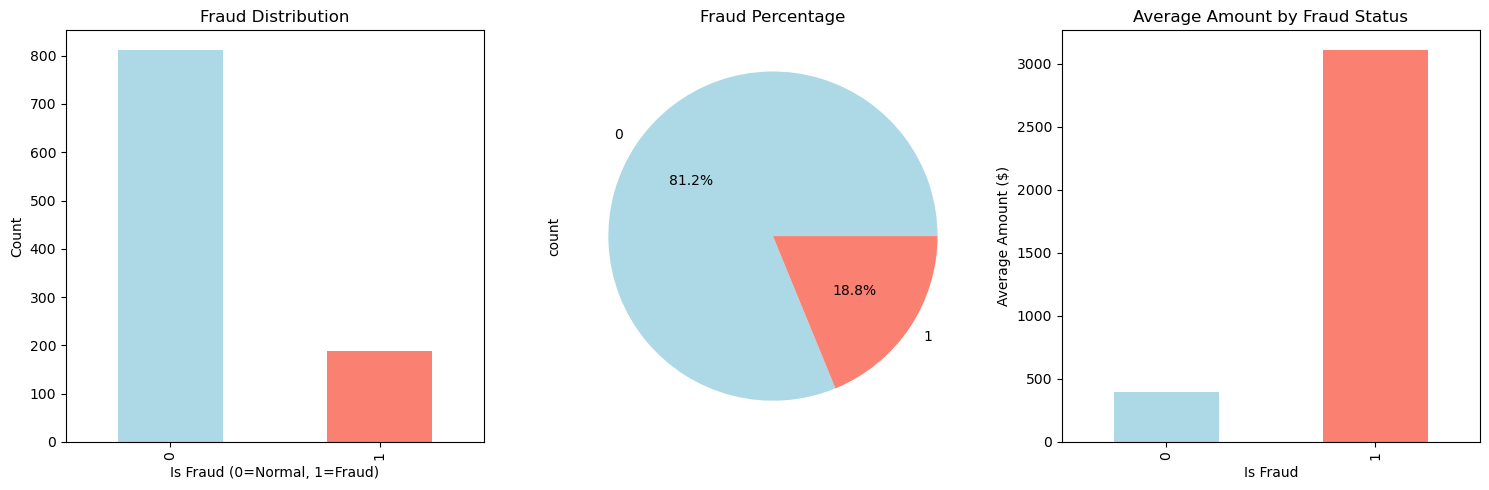

In [4]:
# Fraud distribution visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['is_fraud'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Fraud Distribution')
plt.xlabel('Is Fraud (0=Normal, 1=Fraud)')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
df['is_fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Fraud Percentage')

plt.subplot(1, 3, 3)
fraud_by_amount = df.groupby('is_fraud')['transaction_amount'].mean()
fraud_by_amount.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Average Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Average Amount ($)')

plt.tight_layout()
plt.savefig('fraud_target_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



## TRANSACTION AMOUNT ANALYSIS

Transaction Amount Statistics:
count    1000.000000
mean      905.100510
std      1160.136751
min        10.150000
25%       239.940000
50%       489.265000
75%       741.700000
max      4951.480000
Name: transaction_amount, dtype: float64

Amount comparison (Fraud vs Normal):
Average fraud amount: $3107.97
Average normal amount: $395.08
Median fraud amount: $3075.44
Median normal amount: $395.28


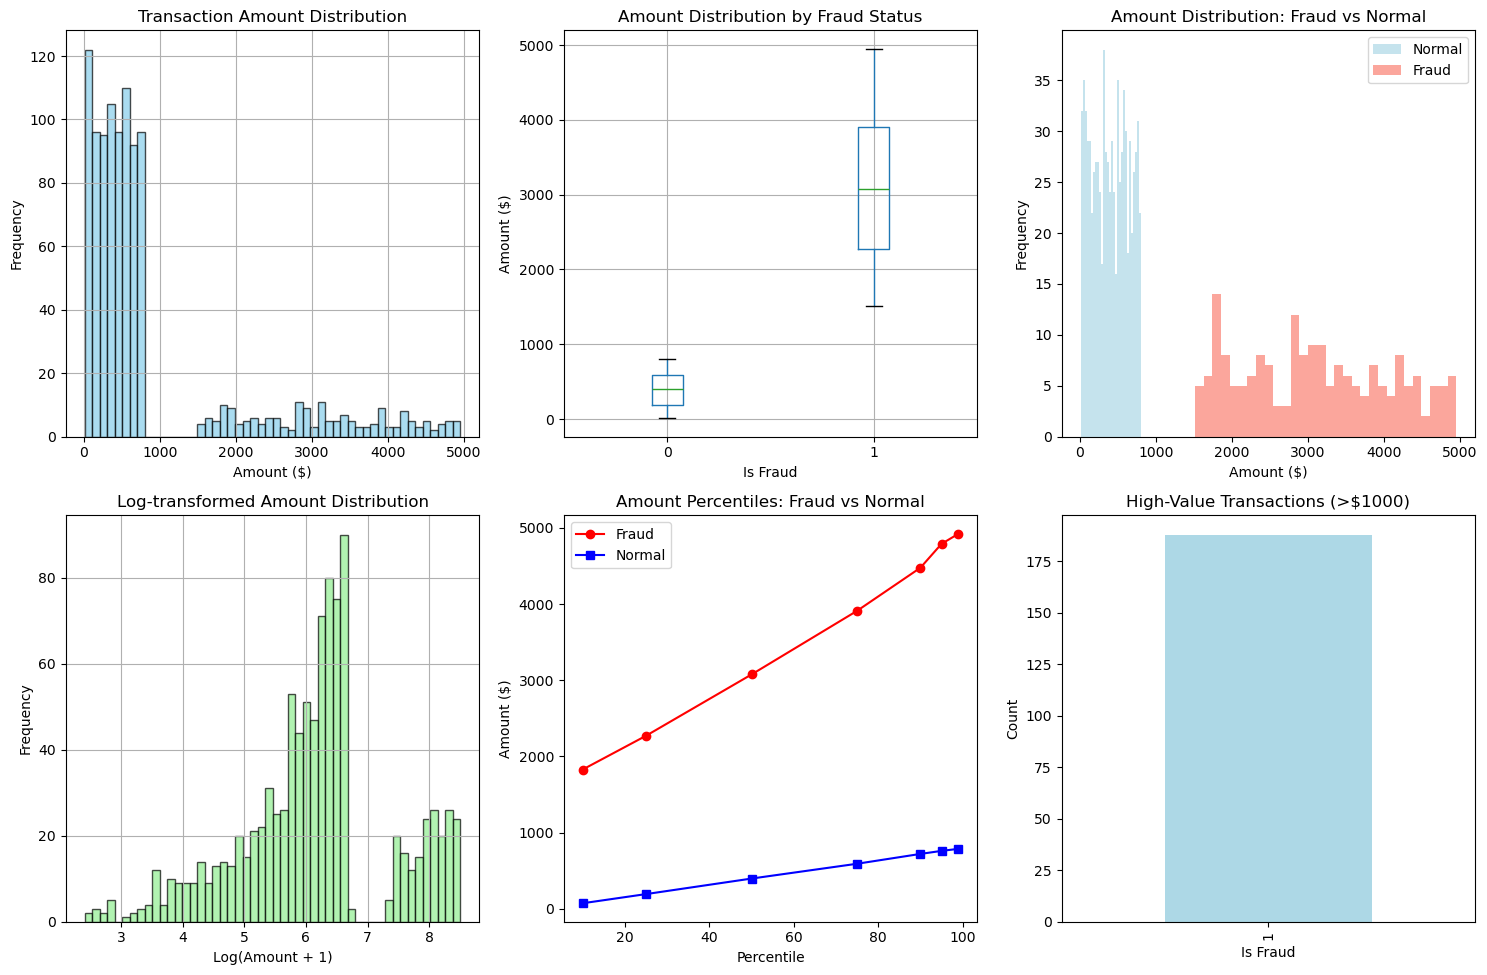

In [5]:

print("Transaction Amount Statistics:")
print(df['transaction_amount'].describe())

print(f"\nAmount comparison (Fraud vs Normal):")
fraud_amounts = df[df['is_fraud'] == 1]['transaction_amount']
normal_amounts = df[df['is_fraud'] == 0]['transaction_amount']

print(f"Average fraud amount: ${fraud_amounts.mean():.2f}")
print(f"Average normal amount: ${normal_amounts.mean():.2f}")
print(f"Median fraud amount: ${fraud_amounts.median():.2f}")
print(f"Median normal amount: ${normal_amounts.median():.2f}")

plt.figure(figsize=(15, 10))

# Amount distribution
plt.subplot(2, 3, 1)
df['transaction_amount'].hist(bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')

# Amount by fraud status (box plot)
plt.subplot(2, 3, 2)
df.boxplot(column='transaction_amount', by='is_fraud', ax=plt.gca())
plt.title('Amount Distribution by Fraud Status')
plt.suptitle('')
plt.xlabel('Is Fraud')
plt.ylabel('Amount ($)')

# Amount distribution (fraud vs normal)
plt.subplot(2, 3, 3)
plt.hist(normal_amounts, bins=30, alpha=0.7, label='Normal', color='lightblue')
plt.hist(fraud_amounts, bins=30, alpha=0.7, label='Fraud', color='salmon')
plt.title('Amount Distribution: Fraud vs Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.legend()

# Log-transformed amount
plt.subplot(2, 3, 4)
log_amounts = np.log1p(df['transaction_amount'])
log_amounts.hist(bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Log-transformed Amount Distribution')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')

# Amount percentiles by fraud
plt.subplot(2, 3, 5)
percentiles = [10, 25, 50, 75, 90, 95, 99]
fraud_percentiles = [np.percentile(fraud_amounts, p) for p in percentiles]
normal_percentiles = [np.percentile(normal_amounts, p) for p in percentiles]

plt.plot(percentiles, fraud_percentiles, marker='o', label='Fraud', color='red')
plt.plot(percentiles, normal_percentiles, marker='s', label='Normal', color='blue')
plt.title('Amount Percentiles: Fraud vs Normal')
plt.xlabel('Percentile')
plt.ylabel('Amount ($)')
plt.legend()

# High-value transactions
plt.subplot(2, 3, 6)
high_value = df[df['transaction_amount'] > 1000]
if not high_value.empty:
    high_value['is_fraud'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
    plt.title('High-Value Transactions (>$1000)')
    plt.xlabel('Is Fraud')
    plt.ylabel('Count')
else:
    plt.text(0.5, 0.5, 'No high-value transactions', ha='center', va='center')
    plt.title('High-Value Transactions (>$1000)')

plt.tight_layout()
plt.savefig('transaction_amount_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



## TIME-BASED ANALYSIS

Transaction Hour Statistics:
count    1000.000000
mean       12.335000
std         5.999397
min         0.000000
25%         9.000000
50%        13.000000
75%        17.000000
max        23.000000
Name: transaction_hour, dtype: float64


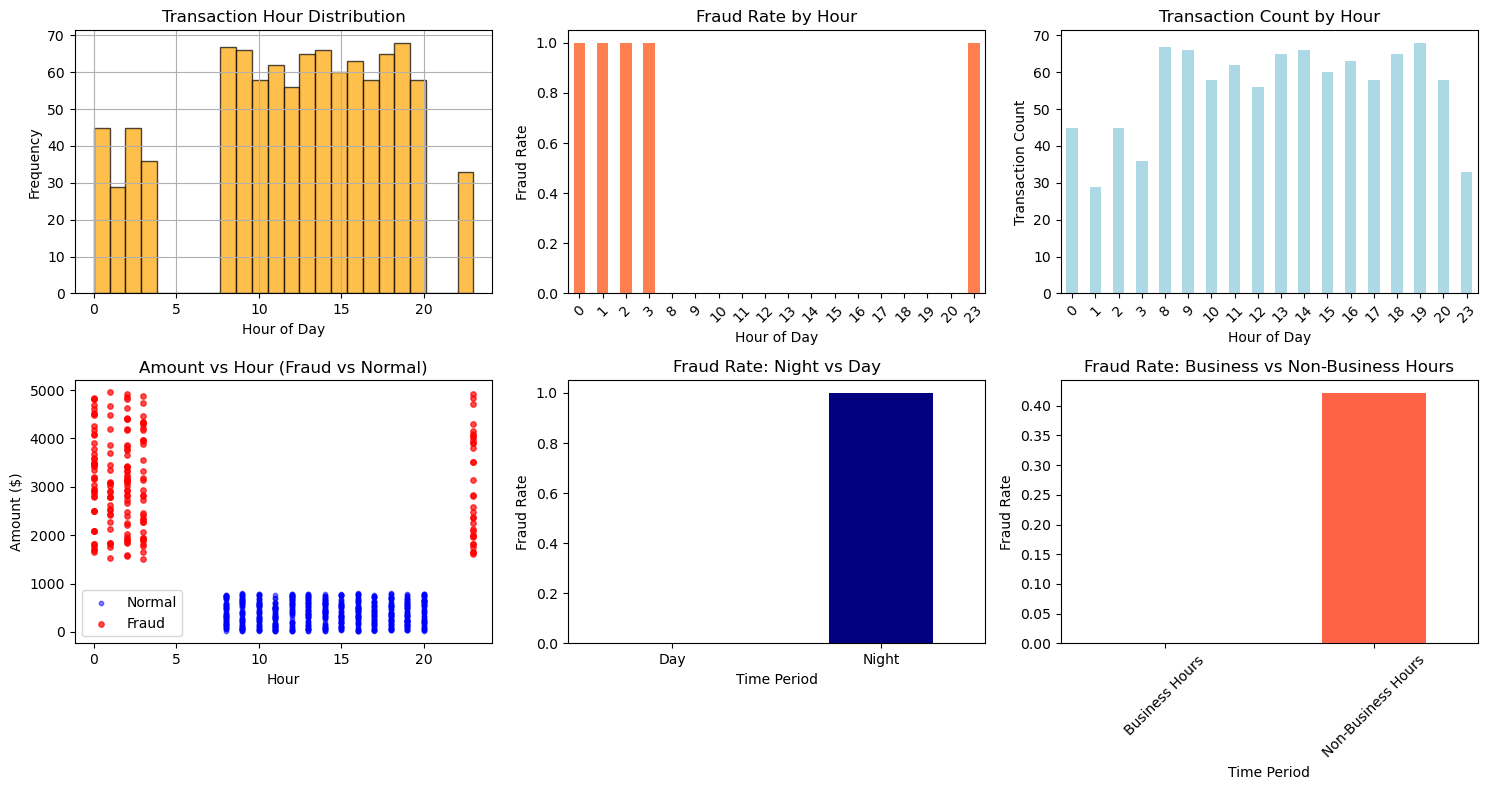

In [6]:

print("Transaction Hour Statistics:")
print(df['transaction_hour'].describe())

plt.figure(figsize=(15, 8))

# Hour distribution
plt.subplot(2, 3, 1)
df['transaction_hour'].hist(bins=24, alpha=0.7, color='orange', edgecolor='black')
plt.title('Transaction Hour Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

# Fraud rate by hour
plt.subplot(2, 3, 2)
hour_fraud = df.groupby('transaction_hour')['is_fraud'].agg(['count', 'mean'])
hour_fraud['mean'].plot(kind='bar', color='coral')
plt.title('Fraud Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)

# Transaction count by hour
plt.subplot(2, 3, 3)
hour_fraud['count'].plot(kind='bar', color='lightblue')
plt.title('Transaction Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)

# Hour vs Amount scatter
plt.subplot(2, 3, 4)
fraud_data = df[df['is_fraud'] == 1]
normal_data = df[df['is_fraud'] == 0]

plt.scatter(normal_data['transaction_hour'], normal_data['transaction_amount'], 
           alpha=0.5, label='Normal', s=10, color='blue')
plt.scatter(fraud_data['transaction_hour'], fraud_data['transaction_amount'], 
           alpha=0.7, label='Fraud', s=15, color='red')
plt.title('Amount vs Hour (Fraud vs Normal)')
plt.xlabel('Hour')
plt.ylabel('Amount ($)')
plt.legend()

# Night vs Day transactions
plt.subplot(2, 3, 5)
df['time_period'] = df['transaction_hour'].apply(
    lambda x: 'Night' if x <= 6 or x >= 22 else 'Day'
)
time_fraud = df.groupby('time_period')['is_fraud'].mean()
time_fraud.plot(kind='bar', color=['gold', 'navy'])
plt.title('Fraud Rate: Night vs Day')
plt.xlabel('Time Period')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=0)

# Business hours analysis
plt.subplot(2, 3, 6)
df['business_hours'] = df['transaction_hour'].apply(
    lambda x: 'Business Hours' if 9 <= x <= 17 else 'Non-Business Hours'
)
business_fraud = df.groupby('business_hours')['is_fraud'].mean()
business_fraud.plot(kind='bar', color=['lightgreen', 'tomato'])
plt.title('Fraud Rate: Business vs Non-Business Hours')
plt.xlabel('Time Period')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



## CATEGORICAL FEATURES ANALYSIS


MERCHANT Analysis:
Unique values: 9
Top 10 values:
merchant
McDonalds          145
Target             142
Shell              141
Amazon             131
Starbucks          130
Walmart            123
Foreign ATM         72
Suspicious Site     66
Unknown Store       50
Name: count, dtype: int64

Top 10 merchant by fraud rate:
                 total_transactions  fraud_count  fraud_rate
merchant                                                    
Foreign ATM                      72           72         1.0
Suspicious Site                  66           66         1.0
Unknown Store                    50           50         1.0
Amazon                          131            0         0.0
McDonalds                       145            0         0.0
Shell                           141            0         0.0
Starbucks                       130            0         0.0
Target                          142            0         0.0
Walmart                         123            0         0.0

CA

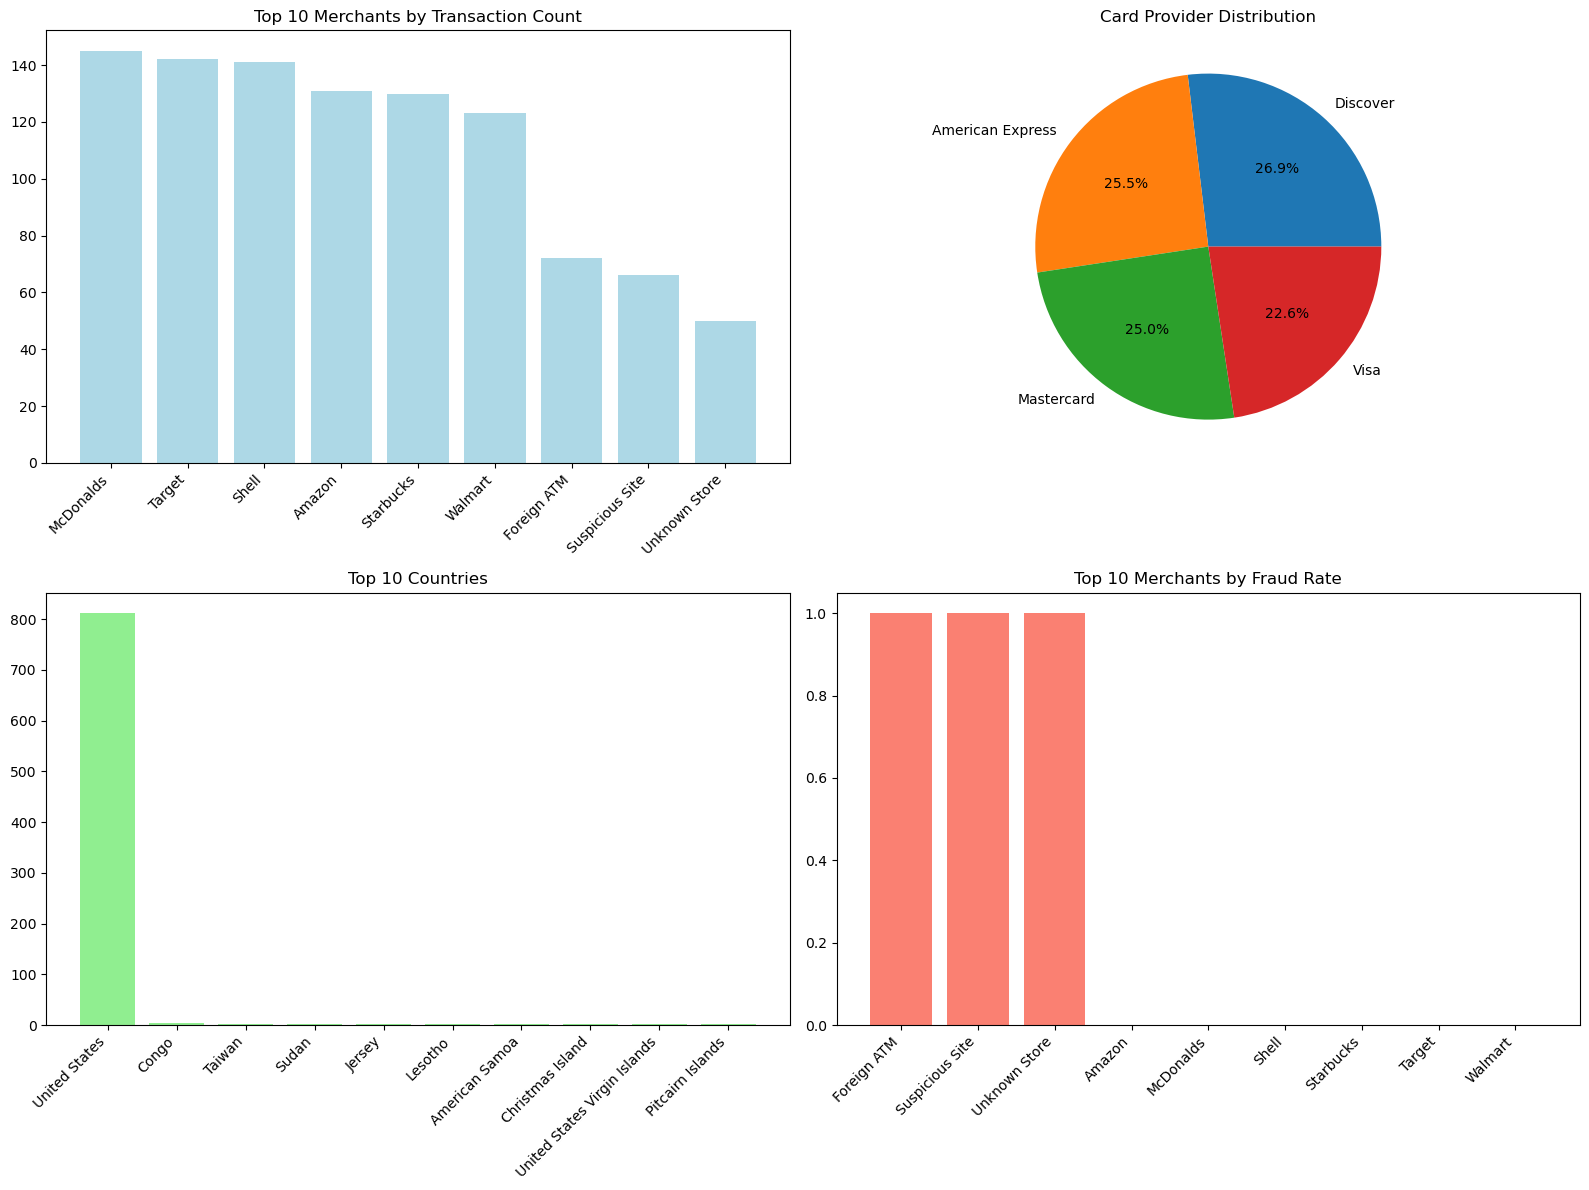

In [7]:

categorical_cols = ['merchant', 'card_provider', 'country', 'state']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()} Analysis:")
        print(f"Unique values: {df[col].nunique()}")
        print("Top 10 values:")
        print(df[col].value_counts().head(10))
        
        # Fraud rate by category
        if df[col].nunique() > 1:
            fraud_rate = df.groupby(col)['is_fraud'].agg(['count', 'sum', 'mean']).sort_values('mean', ascending=False)
            fraud_rate.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
            print(f"\nTop 10 {col} by fraud rate:")
            print(fraud_rate.head(10))

# Visualize categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top merchants
if 'merchant' in df.columns:
    top_merchants = df['merchant'].value_counts().head(10)
    axes[0,0].bar(range(len(top_merchants)), top_merchants.values, color='lightblue')
    axes[0,0].set_title('Top 10 Merchants by Transaction Count')
    axes[0,0].set_xticks(range(len(top_merchants)))
    axes[0,0].set_xticklabels(top_merchants.index, rotation=45, ha='right')

# Card providers
if 'card_provider' in df.columns:
    card_counts = df['card_provider'].value_counts()
    axes[0,1].pie(card_counts.values, labels=card_counts.index, autopct='%1.1f%%')
    axes[0,1].set_title('Card Provider Distribution')

# Countries
if 'country' in df.columns:
    top_countries = df['country'].value_counts().head(10)
    axes[1,0].bar(range(len(top_countries)), top_countries.values, color='lightgreen')
    axes[1,0].set_title('Top 10 Countries')
    axes[1,0].set_xticks(range(len(top_countries)))
    axes[1,0].set_xticklabels(top_countries.index, rotation=45, ha='right')

# Fraud rate by merchant (top 10)
if 'merchant' in df.columns:
    merchant_fraud = df.groupby('merchant')['is_fraud'].mean().sort_values(ascending=False).head(10)
    axes[1,1].bar(range(len(merchant_fraud)), merchant_fraud.values, color='salmon')
    axes[1,1].set_title('Top 10 Merchants by Fraud Rate')
    axes[1,1].set_xticks(range(len(merchant_fraud)))
    axes[1,1].set_xticklabels(merchant_fraud.index, rotation=45, ha='right')

plt.tight_layout()
plt.savefig('categorical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



## CORRELATION ANALYSIS

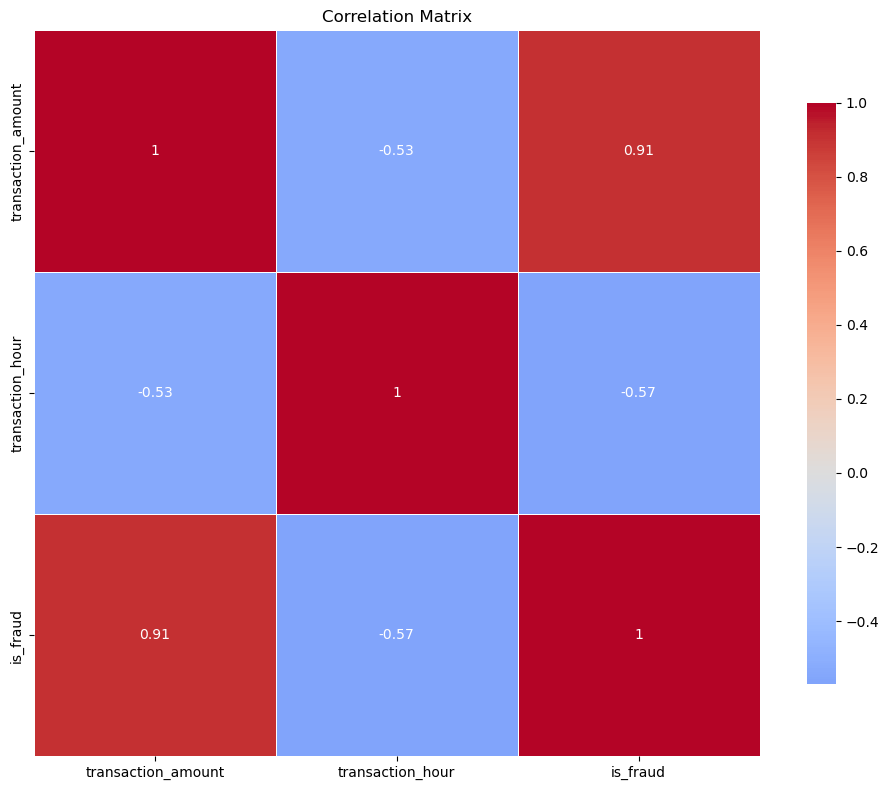

Correlation with fraud:
is_fraud              1.000000
transaction_amount    0.914107
transaction_hour     -0.568953
Name: is_fraud, dtype: float64


In [8]:


# Select numerical columns for correlation
numerical_cols = ['transaction_amount', 'transaction_hour', 'is_fraud']
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Correlation with fraud:")
    fraud_corr = correlation_matrix['is_fraud'].sort_values(ascending=False)
    print(fraud_corr)



## Outlier Detection

In [9]:
# Finding outliers using percentile method

def find_outliers_percentile(data, column, lower_pct=5, upper_pct=95):
    lower_bound = data[column].quantile(lower_pct/100)
    upper_bound = data[column].quantile(upper_pct/100)
    
    # Find outlier records
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound


print("\n TRANSACTION AMOUNT OUTLIERS")
print("-" * 30)

amount_outliers, amount_lower, amount_upper = find_outliers_percentile(df, 'transaction_amount', 5, 95)

print(f"Boundaries:")
print(f"  Lower bound (5th percentile): ${amount_lower:.2f}")
print(f"  Upper bound (95th percentile): ${amount_upper:.2f}")

print(f"\nOutliers found:")
print(f"  Total outliers: {len(amount_outliers)}")
print(f"  Percentage of data: {len(amount_outliers)/len(df)*100:.1f}%")
print(f"  Fraud rate in outliers: {amount_outliers['is_fraud'].mean()*100:.1f}%")

print(f"\nSample outlier records:")
print(amount_outliers[['username', 'transaction_amount', 'merchant', 'is_fraud']].head(10))


print(f"\n TRANSACTION HOUR OUTLIERS")
print("-" * 30)

hour_outliers, hour_lower, hour_upper = find_outliers_percentile(df, 'transaction_hour', 5, 95)

print(f"Boundaries:")
print(f"  Lower bound (5th percentile): {hour_lower:.1f}")
print(f"  Upper bound (95th percentile): {hour_upper:.1f}")

print(f"\nOutliers found:")
print(f"  Total outliers: {len(hour_outliers)}")
print(f"  Percentage of data: {len(hour_outliers)/len(df)*100:.1f}%")
print(f"  Fraud rate in outliers: {hour_outliers['is_fraud'].mean()*100:.1f}%")

print(f"\nSample outlier records:")
print(hour_outliers[['username', 'transaction_hour', 'merchant', 'is_fraud']].head(10))


print(f"\n\n🔍 COMBINED OUTLIERS (AMOUNT + HOUR)")
print("-" * 35)

# Records that are outliers in BOTH amount AND hour
combined_outliers = df[
    ((df['transaction_amount'] < amount_lower) | (df['transaction_amount'] > amount_upper)) &
    ((df['transaction_hour'] < hour_lower) | (df['transaction_hour'] > hour_upper))
]

print(f"Records that are outliers in BOTH amount and hour:")
print(f"  Total combined outliers: {len(combined_outliers)}")
print(f"  Percentage of data: {len(combined_outliers)/len(df)*100:.1f}%")
if len(combined_outliers) > 0:
    print(f"  Fraud rate in combined outliers: {combined_outliers['is_fraud'].mean()*100:.1f}%")
    print(f"\nSample combined outliers:")
    print(combined_outliers[['username', 'transaction_amount', 'transaction_hour', 'merchant', 'is_fraud']].head(5))



 TRANSACTION AMOUNT OUTLIERS
------------------------------
Boundaries:
  Lower bound (5th percentile): $51.17
  Upper bound (95th percentile): $3870.79

Outliers found:
  Total outliers: 100
  Percentage of data: 10.0%
  Fraud rate in outliers: 50.0%

Sample outlier records:
         username  transaction_amount       merchant  is_fraud
2       matthew12               30.76          Shell         0
6     baileydonna               41.13      Starbucks         0
20    thomasowens             4162.71    Foreign ATM         1
30   batesbelinda               34.55      Starbucks         0
49  gibsonrichard             4400.82    Foreign ATM         1
58         elewis             4828.47  Unknown Store         1
61  stewartrodney               36.36         Target         0
70         tklein               15.04      Starbucks         0
72    jamesstrong               41.86         Target         0
75  vanessaflores             4346.12  Unknown Store         1

 TRANSACTION HOUR OUTLIERS
-

we are not removing outliers as it will help in finding fraud trancations.

## SUMMARY STATISTICS

In [56]:
print("Key Insights:")
print(f"• Total transactions: {len(df):,}")
print(f"• Fraud transactions: {df['is_fraud'].sum():,}")
print(f"• Fraud rate: {df['is_fraud'].mean()*100:.2f}%")
print(f"• Average transaction amount: ${df['transaction_amount'].mean():.2f}")
print(f"• Average fraud amount: ${df[df['is_fraud']==1]['transaction_amount'].mean():.2f}")
print(f"• Average normal amount: ${df[df['is_fraud']==0]['transaction_amount'].mean():.2f}")
print(f"• Most common hour: {df['transaction_hour'].mode().iloc[0]}")
print(f"• Most fraud-prone hour: {df.groupby('transaction_hour')['is_fraud'].mean().idxmax()}")

if 'merchant' in df.columns:
    print(f"• Total unique merchants: {df['merchant'].nunique()}")
    print(f"• Most common merchant: {df['merchant'].mode().iloc[0]}")

if 'country' in df.columns:
    print(f"• Total unique countries: {df['country'].nunique()}")
    print(f"• Most common country: {df['country'].mode().iloc[0]}")


Key Insights:
• Total transactions: 1,000
• Fraud transactions: 188
• Fraud rate: 18.80%
• Average transaction amount: $905.10
• Average fraud amount: $3107.97
• Average normal amount: $395.08
• Most common hour: 19
• Most fraud-prone hour: 0
• Total unique merchants: 9
• Most common merchant: McDonalds
• Total unique countries: 125
• Most common country: United States
